# Competition in an oligopolistic market 
## - The Cournot Model

Imports and set magics:

In [46]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
#from modelproject import CournotModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description

**Description**

Cournot competition descibes an industry wherein competing firms, who offers identical products. The firms complete via the quantity of output they individually produce, simultaneously and autonomously. This model is named after its founder, the French mathematician Augustin Cournot.

Firstly, we will take a look at the case of a duoploy where only two firms are competing the a given market. the model are given as followed:

$$
\begin{aligned}
\Pi_1(Q) & =p(Q)q_1-q_1MC_1 \\
\Pi_2(Q) & =p(Q)q_2-q_1MC_2 \\
\end{aligned}
$$

In the profit functions provided earlier, price is determined by the total output denoted as $Q$, where for two firms, the total output $Q$ equals the sum of their individual outputs $q_1$ and $q_2$. As an illustrative example, let's assume that the price (expressed as the inverse demand function) follows a linear format, represented by $p = a + bQ$. Consequently, the inverse demand function can be expressed as $p = a + q_1b + q_2b$.

## Analytical solution

The initial segment of this project involves an analytical solution to the Cournot model. Although we acknowledge that this aspect of the project may not be particularly crucial, it is nonetheless essential to include. We utilized the SymPy function for this purpose, and the solution is presented below.

In [47]:
#model = CournotModelClass()


#sol = model.sympy_solve()
#print("Symbolic solution for q1:", sol)

**Setting up with SymPy**

In [48]:
a = sm.symbols('a')
b = sm.symbols('b')
pi_1 = sm.symbols('pi_1')
pi_2 = sm.symbols('pi_2')
mc = sm.symbols('MC')
q1 = sm.symbols('q_1')
q2 = sm.symbols('q_2')
q_star = sm.symbols('q^*')

**Profit functions for each firm**

In [49]:
profit_1 = sm.Eq(pi_1,(a-b*q1-b*q2-mc)*q1)
profit_1

Eq(pi_1, q_1*(-MC + a - b*q_1 - b*q_2))

In [50]:
profit_2 = sm.Eq(pi_2,(a-b*q1-b*q2-mc)*q2)
profit_2

Eq(pi_2, q_2*(-MC + a - b*q_1 - b*q_2))

**FOC for each firm**

In [51]:
#FOC firm 1
profit_1 = (a-b*q1-b*q2-mc)*q1
foc_q1 = sm.diff(profit_1, q1)
foc_q1

-MC + a - 2*b*q_1 - b*q_2

In [52]:
#FOC firm 2
profit_2 = (a-b*q1-b*q2-mc)*q2
foc_q2 = sm.diff(profit_2, q2)
foc_q2

-MC + a - b*q_1 - 2*b*q_2

**Solving for q1 and q2**

In [53]:
#We solve FOC1 for q1
solve_q1 = sm.solve(foc_q1,q1)
solve_q1[0]

(-MC + a - b*q_2)/(2*b)

In [54]:
#We solve FOC2 for q2
solve_q2 = sm.solve(foc_q2,q2)
solve_q2[0]

(-MC + a - b*q_1)/(2*b)

In [55]:
solve_q1_subs = solve_q1[0].subs(q2,q_star)
solve_q1_subs

(-MC + a - b*q^*)/(2*b)

In [56]:
solve_q2_subs = solve_q2[0].subs(q1,q_star)
solve_q2_subs

(-MC + a - b*q^*)/(2*b)

In [57]:
nash_eq = sm.Eq(q_star,solve_q1_subs)
nash_eq

Eq(q^*, (-MC + a - b*q^*)/(2*b))

In [58]:
nash_eq_solve = sm.solve(nash_eq,q_star)
nash_eq_solve[0]

(-MC + a)/(3*b)

Using SymPy, we derived the response functions for both firms and determined the Nash Equilibrium, which is:

$$
\begin{aligned}
\ q_1 = q_2 = \frac{a - bq^*-MC}{2b} \
\end{aligned}
$$
$$
\begin{aligned}
\ Nash & = \frac{a - MC}{3b} \
\end{aligned}
$$

**Creating functions using Lamdify**

After utilizing SymPy to derive the solution, we will employ lambdify to convert these  expressions into callable functions. By doing so, we can efficiently evaluate these expressions using specific numerical values, facilitating numerical analysis and computation

In [14]:
best_resp_q1 = sm.lambdify(args=(a,b,mc),expr=solve_q1[0])
best_resp_q2 = sm.lambdify(args=(a,b,mc),expr=solve_q2[0])
nash_qstar = sm.lambdify(args=(a,b,mc),expr=nash_eq_solve[0])

In [26]:
a_val = 50
b_val = 3
mc_vec = np.linspace(1,10,10)

nash_eq = nash_qstar(a_val, b_val, mc_vec)

for mc, n in zip(mc_vec, nash_eq):
    print(f'For mc = {mc:1.1f}, we have q* = {n:1.3f}')


For mc = 1.0, we have q* = 5.444
For mc = 2.0, we have q* = 5.333
For mc = 3.0, we have q* = 5.222
For mc = 4.0, we have q* = 5.111
For mc = 5.0, we have q* = 5.000
For mc = 6.0, we have q* = 4.889
For mc = 7.0, we have q* = 4.778
For mc = 8.0, we have q* = 4.667
For mc = 9.0, we have q* = 4.556
For mc = 10.0, we have q* = 4.444


## Numerical solution

Once the analytical solution has been obtained, we will proceed to solve the model numerically. Initially, we will employ an optimizer followed by a root finder to determine the quantities for the two firms. Below, you will find the relevant code for this numerical solution process.

In [61]:

def profit_1_duo(a,b,q1,q2,mc):
        return (a-b*q1-b*q2-mc)*q1

def BR1_duo(q2,a,b,mc):
       sol_BR1_duo = optimize.minimize(lambda q: -profit_1_duo(a,b,q,q2,mc),x0=0.1,bounds=[(0, None)])
       return sol_BR1_duo.x[0]
       
def profit_2_duo(a,b,q1,q2,mc):
        return (a-b*q1-b*q2-mc)*q2

def BR2_duo(q1,a,b,mc):
       sol_BR2_duo = optimize.minimize(lambda q: -profit_2_duo(a,b,q1,q,mc),x0=0.1,bounds=[(0, None)])
       return sol_BR2_duo.x[0]

def H_duo(q, a, b, mc):
    q1,q2 = q
    err1 = BR1_duo(q2,a,b,mc)-q1
    err2 = BR2_duo(q1,a,b,mc)-q2
    return [err1, err2]

a = 50
b = 3
mc_duo = 1

# Solve for Nash equilibrium
result_duo = optimize.root(lambda q: H_duo(q, a, b, mc_duo), [0.1, 0.1])

# Extract equilibrium quantities
q_star = result_duo.x
q1_star, q2_star = q_star

print("Nash Equilibrium for mc1 = mc2 = {mc_duo:1.1f}")
print("q1* =", q1_star)
print("q2* =", q2_star)


Nash Equilibrium:
q1* = 5.444444356380503
q2* = 5.444444332332309


By experimenting with the value of MC within the range of 1 to 5, you will observe that both the analytical and numerical solutions yield identical results, indicating a promising consistency between the two methods.

To illustarte this, we will plot the solution below.

In [69]:
a = 50
b = 3
mc_default = 5

result = optimize.root(lambda q: H_duo(q, a, b, mc_default), [0.1, 0.1])
q_star = result.x
q1_star, q2_star = q_star

q_values = np.linspace(0, 15, 100)

def update_plot(mc=mc_default):
    q1_values = [BR1_duo(q2, a, b, mc) for q2 in q_values]
    q2_values = [BR2_duo(q1, a, b, mc) for q1 in q_values]
    
    result = optimize.root(lambda q: H_duo(q, a, b, mc), [0.1, 0.1])
    q_star = result.x
    q1_star, q2_star = q_star
    
    plt.figure(figsize=(8, 6))
    plt.plot(q1_values, q_values, label='Best Response Firm 1', color='blue')
    plt.plot(q_values, q2_values, label='Best Response Firm 2', color='red')
    plt.scatter(q1_star, q2_star, color='green', label='Nash Equilibrium')
    plt.plot([q1_star, q1_star], [0, q2_star], color='green', linestyle='--')
    plt.plot([0, q1_star], [q2_star, q2_star], color='green', linestyle='--')
    plt.xlim(0, None)  # Setting x-axis limit to only show positive values
    plt.ylim(0, None)  # Setting y-axis limit to only show positive values
    plt.xlabel('q1')
    plt.ylabel('q2')
    plt.title('Best Response Functions and Nash Equilibrium')
    plt.legend()
    plt.grid(True)
    plt.show()

widgets.interact(update_plot, mc=(1, 30, 1))


interactive(children=(IntSlider(value=5, description='mc', max=30, min=1), Output()), _dom_classes=('widget-in…

<function __main__.update_plot(mc=5)>

We've incorporated a slider for the marginal cost (MC) to demonstrate how changes in firms' marginal costs affect the solution of the model. As anticipated, when firms face rising marginal costs, their total output decreases.

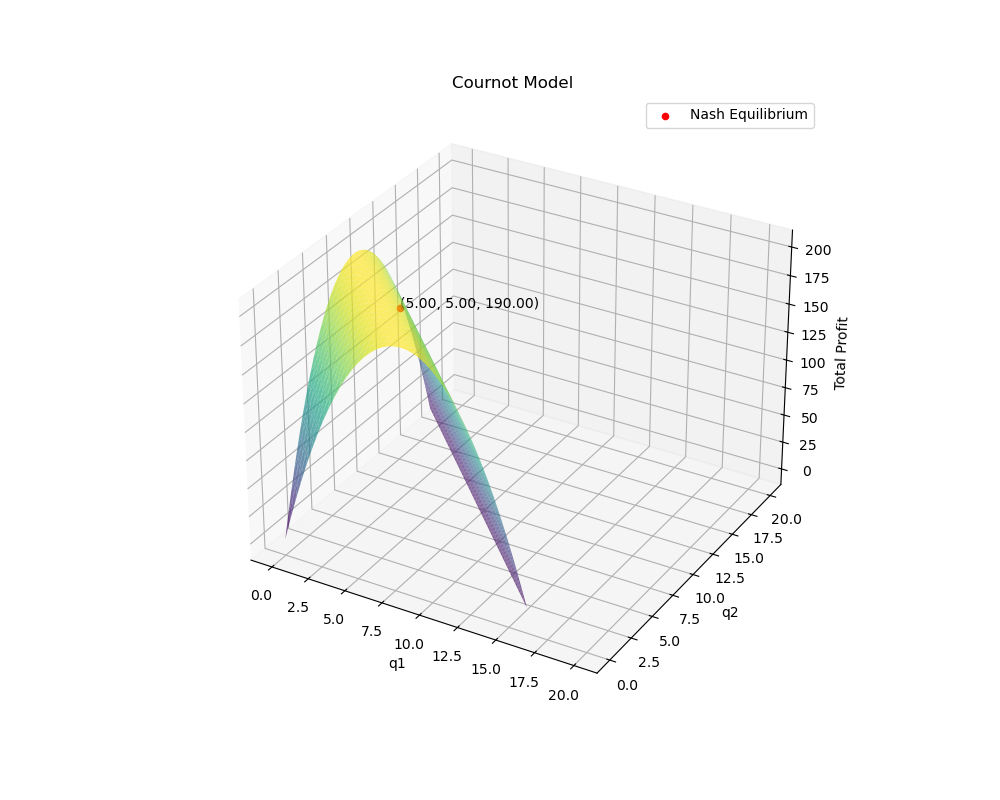

In [63]:
#%matplotlib widget

#def tot_profit_duo(q, a, b, mc):
    #q1, q2 = q
    #return profit_1_duo(a, b, q1, q2, mc) + profit_2_duo(a, b, q1, q2, mc)

#profit_star = tot_profit_duo(q_star, a, b, mc)

#q1_range = np.linspace(0, 20, 100)
#q2_range = np.linspace(0, 20, 100)
#q1, q2 = np.meshgrid(q1_range, q2_range)
#profit = tot_profit_duo([q1, q2], a, b, mc)

#profit[profit < 0] = np.nan

#fig = plt.figure(figsize=(10, 8))
#ax = fig.add_subplot(111, projection='3d')
#ax.plot_surface(q1, q2, profit, cmap='viridis', alpha=0.7)
#ax.scatter(q1_star, q2_star, profit_star, color='red', label='Nash Equilibrium')
#ax.set_xlabel('q1')
#ax.set_ylabel('q2')
#ax.set_zlabel('Total Profit')
#ax.set_title('Cournot Model')

# Annotate Nash equilibrium point
#ax.text(q1_star, q2_star, profit_star, f'({q1_star:.2f}, {q2_star:.2f}, {profit_star:.2f})', color='black')

#ax.legend()
#plt.show()

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

# Further analysis

In [64]:
# Define profit functions and best response functions for Firm 1
def profit_1_oligo(a,b,q1,q2,q3,mc):
    return (a-b*q1-b*q2-b*q3-mc)*q1

def BR1_oligo(q2,q3,a,b,mc):
    sol_BR1_oligo = optimize.minimize(lambda q: -profit_1_oligo(a,b,q,q2,q3,mc), x0=0.1, bounds=[(0, None)])
    return sol_BR1_oligo.x[0]  

# Define profit functions and best response functions for Firm 2
def profit_2_oligo(a,b,q1,q2,q3,mc):
    return (a-b*q1-b*q2-b*q3-mc)*q2

def BR2_oligo(q1, q3, a, b, mc):
    sol_BR2_oligo = optimize.minimize(lambda q: -profit_2_oligo(a,b,q1,q,q3,mc), x0=0.1, bounds=[(0, None)])
    return sol_BR2_oligo.x[0]

# Define profit functions and best response functions for Firm 3
def profit_3_oligo(a,b,q1,q2,q3,mc):
    return (a-b*q1-b*q2-b*q3-mc)*q3

def BR3_oligo(q1,q2,a,b,mc):
    sol_BR3_oligo = optimize.minimize(lambda q: -profit_3_oligo(a,b,q1,q2,q,mc), x0=0.1, bounds=[(0, None)])
    return sol_BR3_oligo.x[0]

# Define function H(q)
def H_oligo(q,a,b,mc):
    q1, q2, q3 = q
    err1 = BR1_oligo(q2,q3,a,b,mc)-q1
    err2 = BR2_oligo(q1,q3,a,b,mc)-q2
    err3 = BR3_oligo(q1,q2,a,b,mc)-q3
    return [err1, err2, err3]

# Set parameters
a = 50
b = 3
mc = 1

# Solve for Nash equilibrium
result = optimize.root(lambda q: H_oligo(q,a,b,mc), [0.1, 0.1, 0.1])

# Extract equilibrium quantities
q_star = result.x
q1_star, q2_star, q3_star = q_star

print("Nash Equilibrium:")
print("q1* =", q1_star)
print("q2* =", q2_star)
print("q3* =", q3_star)

Nash Equilibrium:
q1* = 4.083333358357541
q2* = 4.0833330289272185
q3* = 4.083333475753608


In [66]:
q1_star = 4.083333358357541
q2_star = 4.0833330289272185
q3_star = 4.083333475753608

total_output = q1_star + q2_star + q3_star
print("Total Output:", total_output)


Total Output: 12.249999863038369


In [67]:
q1_star = 3.9837492542581083
q2_star = 4.116544520347763
q3_star = 4.116485352752944

total_output = q1_star + q2_star + q3_star
print("Total Output:", total_output)


Total Output: 12.216779127358816


In [65]:
def mc1(q1):
    return 1+(5*q1)

def mc2(q2):
    return 1+(5*q2)

def mc3(q3):
    return 1+(5*q3)


def profit_1_mc_var(a, b, q1, q2, q3, mc1):
    return (a - b * q1 - b * q2 - b * q3 - mc1) * q1

def BR1_mc_var(q2, q3, a, b, mc1):
    sol_BR1_mc_var = optimize.minimize(lambda q: -profit_1_mc_var(a, b, q, q2, q3, mc1), x0=0.1, bounds=[(0, None)])
    return sol_BR1_mc_var.x[0]  


def profit_2_mc_var(a, b, q1, q2, q3, mc2):
    return (a - b * q1 - b * q2 - b * q3 - mc2) * q2

def BR2_mc_var(q1, q3, a, b, mc2):
    sol_BR2_mc_var = optimize.minimize(lambda q: -profit_2_mc_var(a, b, q1, q, q3, mc2), x0=0.1, bounds=[(0, None)])
    return sol_BR2_mc_var.x[0]


def profit_3_mc_var(a, b, q1, q2, q3, mc3):
    return (a - b * q1 - b * q2 - b * q3 - mc3) * q3

def BR3_mc_var(q1, q2, a, b, mc3):
    sol_BR3_mc_var = optimize.minimize(lambda q: -profit_3_mc_var(a, b, q1, q2, q, mc3), x0=0.1, bounds=[(0, None)])
    return sol_BR3_mc_var.x[0]

# Define function H(q)
def H_mc_var(q, a, b, mc1, mc2, mc3):
    q1, q2, q3 = q
    err1 = BR1_mc_var(q2, q3, a, b, mc1) - q1
    err2 = BR2_mc_var(q1, q3, a, b, mc2) - q2
    err3 = BR3_mc_var(q1, q2, a, b, mc3) - q3
    return [err1, err2, err3]

# Set parameters
a = 50
b = 3


# Solve for Nash equilibrium with constraints on q >= 0 using minimize function
result = optimize.minimize(lambda q: np.sum(np.square(H_mc_var(q, a, b, mc1(q[0]), mc2(q[1]), mc3(q[2])))),
                           x0=[0.1, 0.1, 0.1], bounds=[(0, None), (0, None), (0, None)], method='nelder-mead')

# Extract equilibrium quantities
q_star = result.x
q1_star, q2_star, q3_star = q_star

print("Nash Equilibrium:")
print("q1* =", q1_star)
print("q2* =", q2_star)
print("q3* =", q3_star)

Nash Equilibrium:
q1* = 3.9837492542581083
q2* = 4.116544520347763
q3* = 4.116485352752944


Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

**The model**

$$
\begin{aligned}
\pi_i(q_1,....,q_n) & =q_iP \left( \sum_{j=1}^{n}q_j\right)-C_i(q_i) \\

\end{aligned}
$$
  

# Conclusion

Add concise conclusion. 